# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis
### Removed the data for non-AMI/HF/PN readmissions

####Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. 


In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


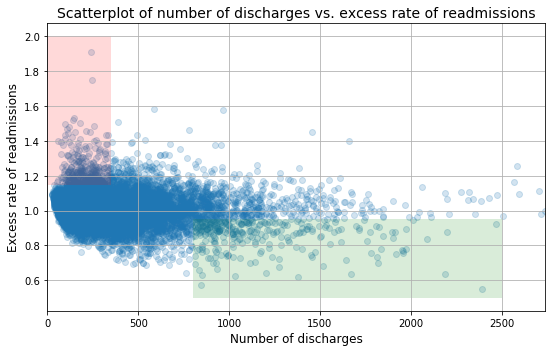

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
       Prem.A.Response: The conclusions are not founded. Even though values exist in those areas, there is not overall trend analysis based on the whole of the data. The data is too clustered to make definitive observations on visual cues alone.
   
       Prem.B.Response: Based on below calculations, statistics are correct.
  
       Prem.C.Response: No correlation analysis is found, so not sure where the conclusion comes from.
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Confirming below that the statistics is accurate

In [5]:
print('Prem.B.Response :')
LT100Disch = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <100]['Excess Readmission Ratio'].count()
LT100DisGT1Exc = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <100) & (clean_hospital_read_df['Excess Readmission Ratio'] >1)]['Excess Readmission Ratio'].count()
GT1000Disch = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >1000]['Excess Readmission Ratio'].count()
GT1000DiGT1Exc = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000) & (clean_hospital_read_df['Excess Readmission Ratio'] >1)]['Excess Readmission Ratio'].count()
print('100-Disch Excess GT1 Ratio :', LT100DisGT1Exc/LT100Disch)
print('1000+Disch Excess GT1 Ratio :', GT1000DiGT1Exc/GT1000Disch)
print('100-Disch Excess Rate Mean :',np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <100]['Excess Readmission Ratio']))
print('1000+Disch Excess Rate Mean :',np.mean(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']))

Prem.B.Response :
100-Disch Excess GT1 Ratio : 0.632154882155
1000+Disch Excess GT1 Ratio : 0.444924406048
100-Disch Excess Rate Mean : 1.0226183501683506
1000+Disch Excess Rate Mean : 0.9783354211663071


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [7]:
#relevant_data = data[data['Measure Name'] == ('READM-30-AMI-HRRP	')]
relevant_data = clean_hospital_read_df.loc[(clean_hospital_read_df['Measure Name'].isin(['READM-30-AMI-HRRP','READM-30-HF-HRRP','READM-30-PN-HRRP']))]
#& df['other_column'].isin(some_values) ,'READM-30-PN-HRRP'

In [8]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 15606 to 1892
Data columns (total 12 columns):
Hospital Name                 7447 non-null object
Provider Number               7447 non-null int64
State                         7447 non-null object
Measure Name                  7447 non-null object
Number of Discharges          7447 non-null int64
Footnote                      48 non-null float64
Excess Readmission Ratio      7399 non-null float64
Predicted Readmission Rate    7399 non-null float64
Expected Readmission Rate     7399 non-null float64
Number of Readmissions        7399 non-null float64
Start Date                    7447 non-null object
End Date                      7447 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 756.3+ KB


In [9]:
clean_hospital_read_df['Number of Discharges'].corr(clean_hospital_read_df['Excess Readmission Ratio'])

-0.097397943510793533

## Below, I am limiting our study to only AMI, HF and PN, given the definition of Readmission above. This may not be the approach course admin has in mind, but I thought it makes sense from the question (And also after running the first iteration, these results seemed more interesting)

In [10]:
relevant_data['Number of Discharges'].corr(relevant_data['Excess Readmission Ratio'])

-0.038166767811162738

## Hypothesis :  There is not a inverse relationship between Number of Discharges and Excess Readmission Ratio

In [31]:
dataForBootstrap = relevant_data[['Number of Discharges', 'Excess Readmission Ratio']]

In [32]:
dataForBootstrap = dataForBootstrap.dropna(axis=0,how='any')
dataForBootstrap = dataForBootstrap.reset_index(drop=True)

In [33]:
Discharges = dataForBootstrap['Number of Discharges']
ExcessReadmitRate = dataForBootstrap['Excess Readmission Ratio']

In [34]:
np.polyfit(Discharges,ExcessReadmitRate,1)

array([ -1.03298622e-05,   1.00850863e+00])

In [35]:
dataForBootstrap.describe()

,Number of Discharges,Excess Readmission Ratio
count,7399.000000,7399.000000
mean,345.857008,1.004936
std,288.611190,0.078113
min,25.000000,0.699700
25%,147.000000,0.953450
50%,264.000000,1.002900
75%,454.000000,1.056300
max,3570.000000,1.389200


In [36]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [37]:
bs_slope_reps , bs_intercept_reps = draw_bs_pairs_linreg(Discharges,ExcessReadmitRate,size=100000)

[ -1.69168596e-05  -3.87398448e-06]


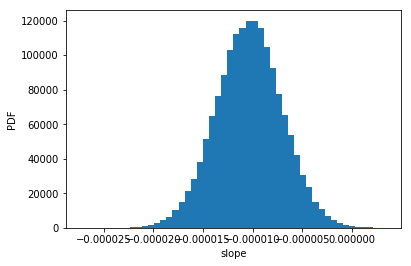

In [38]:
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

In [39]:
p = np.sum(bs_slope_reps >= 0)/len(bs_slope_reps)
print(p)

0.00099


## Rejecting Null Hypothesis :   based on above information there is anly a 0.01 % chance that there is not a negative trend of Excess Readmissions with increasing size of hospital. 
## Therefore the confidence level is very high that there is a negative relationship between Excess Readmissions and Hospital Discharge Volums/size


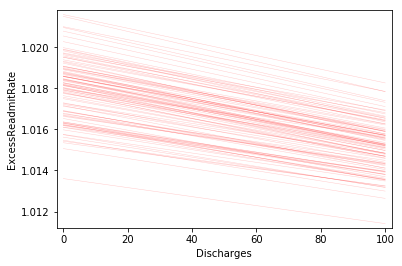

In [27]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot()

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Discharges')
_ = plt.ylabel('ExcessReadmitRate')
plt.margins(0.02)
plt.show()

## A better way to show the plot is to use density information on each axis to know how much overlap there is between all the points. 
## The disadvantage of the initial plot was that you should not tell anything about distribution of the overlapping data points

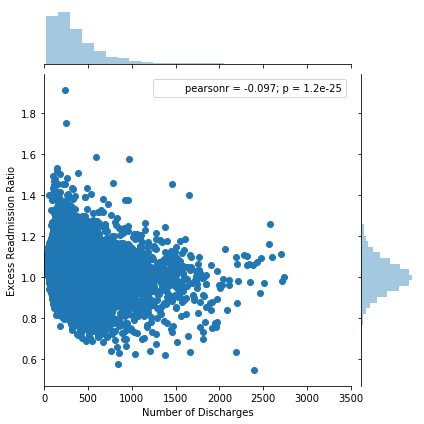

In [30]:
sns.jointplot(Discharges, ExcessReadmitRate, xlim=(0,3500))